<a href="https://colab.research.google.com/github/Alisufyangondal/Project/blob/main/Data_science_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Data Loading and Preprocessing
Load the CSV file, parse dates, handle missing or anomalous values (e.g. -1 as missing), and prepare the time series data for modeling.

In [ ]:
import pandas as pd
import numpy as np

#load the dataset


df = pd.read_csv("/content/drive/MyDrive/my project csv/sunspot.csv")

df.head()



,Year,Month,Day,Date In Fraction Of Year,Number of Sunspots,Standard Deviation,Observations,Indicator
0,1818,1,1,1818.001,-1,-1.0,0,1
1,1818,1,2,1818.004,-1,-1.0,0,1
2,1818,1,3,1818.007,-1,-1.0,0,1
3,1818,1,4,1818.010,-1,-1.0,0,1
4,1818,1,5,1818.012,-1,-1.0,0,1


In [ ]:
df.isnull().sum()

Year                        0
Month                       0
Day                         0
Date In Fraction Of Year    0
Number of Sunspots          0
Standard Deviation          0
Observations                0
Indicator                   0
dtype: int64

In [ ]:
# Convert Year, Month, and Day to Date column
df['Date'] = pd.to_datetime(
    dict(year=df['Year'], month=df['Month'], day=df['Day'])
)

# Set the Date column as index
df = df.reset_index(drop=True)

# Display the first few rows of the dataframe
df.head()

,Year,Month,Day,Date In Fraction Of Year,Number of Sunspots,Standard Deviation,Observations,Indicator,Date
0,1818,1,1,1818.001,-1,-1.0,0,1,1818-01-01
1,1818,1,2,1818.004,-1,-1.0,0,1,1818-01-02
2,1818,1,3,1818.007,-1,-1.0,0,1,1818-01-03
3,1818,1,4,1818.010,-1,-1.0,0,1,1818-01-04
4,1818,1,5,1818.012,-1,-1.0,0,1,1818-01-05


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 75665 entries, 0 to 75664
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype         
---  ------                    --------------  -----         
 0   Year                      75665 non-null  int64         
 1   Month                     75665 non-null  int64         
 2   Day                       75665 non-null  int64         
 3   Date In Fraction Of Year  75665 non-null  float64       
 4   Number of Sunspots        75665 non-null  int64         
 5   Standard Deviation        75665 non-null  float64       
 6   Observations              75665 non-null  int64         
 7   Indicator                 75665 non-null  int64         
 8   Date                      75665 non-null  datetime64[ns]
dtypes: datetime64[ns](1), float64(2), int64(6)
memory usage: 5.2 MB


# **Data Visualisation**
Plot the raw time series data to understand trends and seasonality, using libraries such as matplotlib or seaborn.

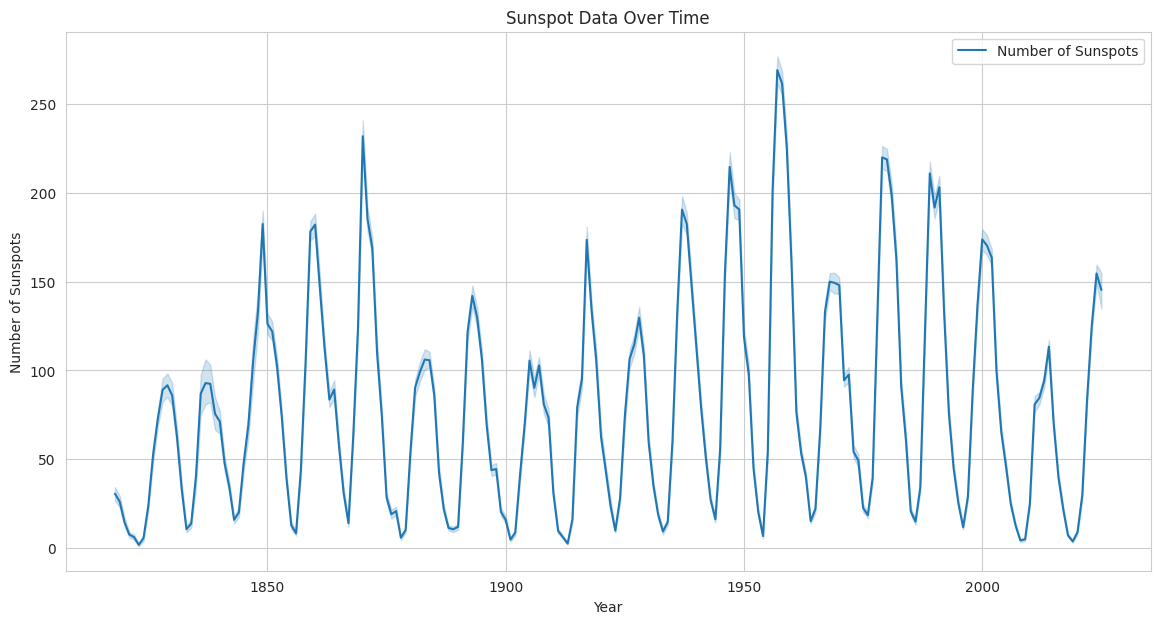

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Set the aesthetic style of the plots
sns.set_style("whitegrid")

# Plot the raw time series data using Seaborn
plt.figure(figsize=(14, 7))
sns.lineplot(x='Year', y='Number of Sunspots', data=df, label='Number of Sunspots')
plt.title('Sunspot Data Over Time')
plt.xlabel('Year')
plt.ylabel('Number of Sunspots')
plt.legend()
plt.show()

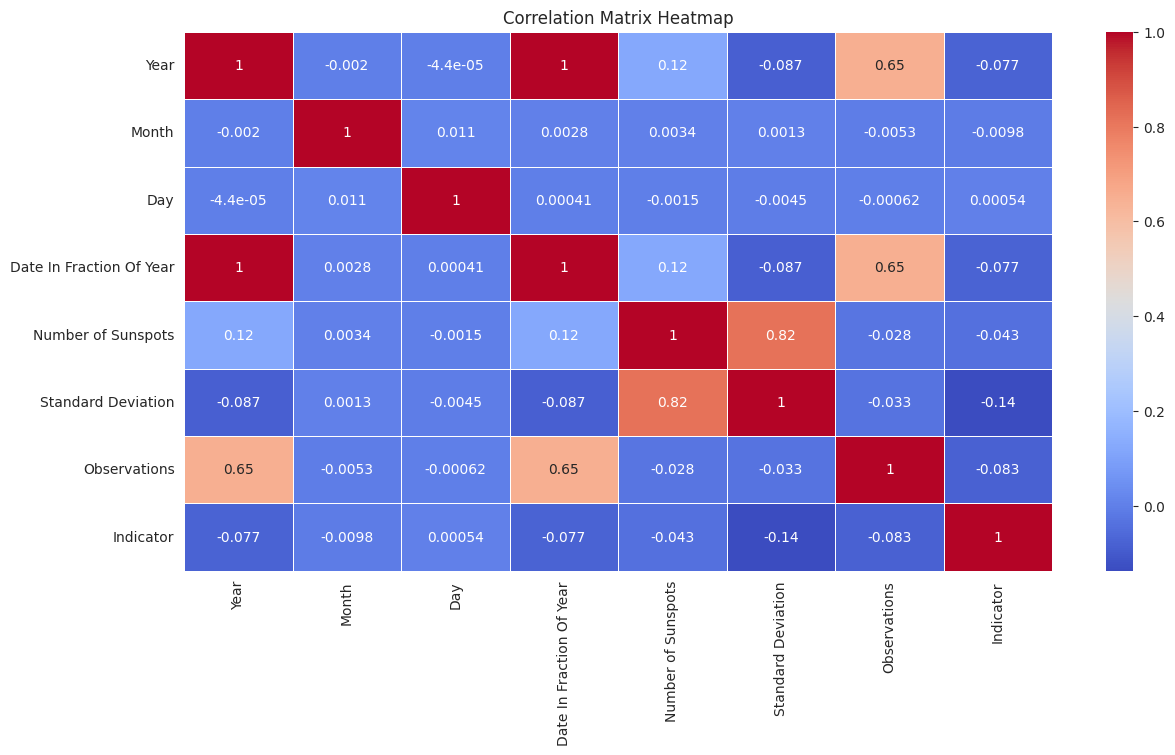

In [ ]:
# Calculate the correlation matrix
correlation_matrix = df.corr()

# Plot the heatmap
plt.figure(figsize=(14, 7))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Matrix Heatmap')
plt.show()

In [ ]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.models import Sequential # type: ignore
from tensorflow.keras.layers import Dense, LSTM # type: ignore

# Select the 'Number of Sunspots' column
data = df[['Number of Sunspots']].values

# Scale the data
scaler = MinMaxScaler()
data_scaled = scaler.fit_transform(data)

# Define a function to create sequences of data
def create_sequences(dataset, look_back=30):
    X, y = [], []
    for i in range(len(dataset) - look_back):
        X.append(dataset[i:i+look_back])
        y.append(dataset[i+look_back])
    return np.array(X), np.array(y)

look_back = 30
X_all, y_all = create_sequences(data_scaled, look_back=look_back)

# Split into train and test
train_size = int(len(X_all) * 0.8)
X_train, X_test = X_all[:train_size], X_all[train_size:]
y_train, y_test = y_all[:train_size], y_all[train_size:]


In [ ]:
from tensorflow.keras.layers import Input # type: ignore

# Build the LSTM model
model = Sequential()
model.add(Input(shape=(look_back, 1)))
model.add(LSTM(50, activation='relu', return_sequences=False))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mse')

In [ ]:
# Train the model
history = model.fit(X_train, y_train, epochs=10,
                    batch_size=32,
                    validation_data=(X_test, y_test),
                    verbose=1)

Epoch 1/10
1891/1891 ━━━━━━━━━━━━━━━━━━━━ 34s 17ms/step - loss: 0.0070 - val_loss: 0.0014
Epoch 2/10
1891/1891 ━━━━━━━━━━━━━━━━━━━━ 31s 16ms/step - loss: 0.0039 - val_loss: 0.0010
Epoch 3/10
1891/1891 ━━━━━━━━━━━━━━━━━━━━ 40s 16ms/step - loss: 0.0038 - val_loss: 7.8263e-04
Epoch 4/10
1891/1891 ━━━━━━━━━━━━━━━━━━━━ 41s 16ms/step - loss: 0.0036 - val_loss: 7.1646e-04
Epoch 5/10
1891/1891 ━━━━━━━━━━━━━━━━━━━━ 41s 16ms/step - loss: 0.0036 - val_loss: 8.5455e-04
Epoch 6/10
1891/1891 ━━━━━━━━━━━━━━━━━━━━ 30s 16ms/step - loss: 0.0035 - val_loss: 7.4355e-04
Epoch 7/10
1891/1891 ━━━━━━━━━━━━━━━━━━━━ 41s 16ms/step - loss: 0.0036 - val_loss: 7.7845e-04
Epoch 8/10
1891/1891 ━━━━━━━━━━━━━━━━━━━━ 41s 16ms/step - loss: 0.0037 - val_loss: 7.3422e-04
Epoch 9/10
1891/1891 ━━━━━━━━━━━━━━━━━━━━ 41s 16ms/step - loss: 0.0035 - val_loss: 7.9898e-04
Epoch 10/10
1891/1891 ━━━━━━━━━━━━━━━━━━━━ 30s 16ms/step - loss: 0.0036 - val_loss: 7.4574e-04


In [ ]:
# Make predictions
predictions = model.predict(X_test)
predictions = scaler.inverse_transform(predictions)

473/473 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step


In [ ]:
# Inverse-transform actual values for comparison
actual = scaler.inverse_transform(y_test.reshape(-1, 1))

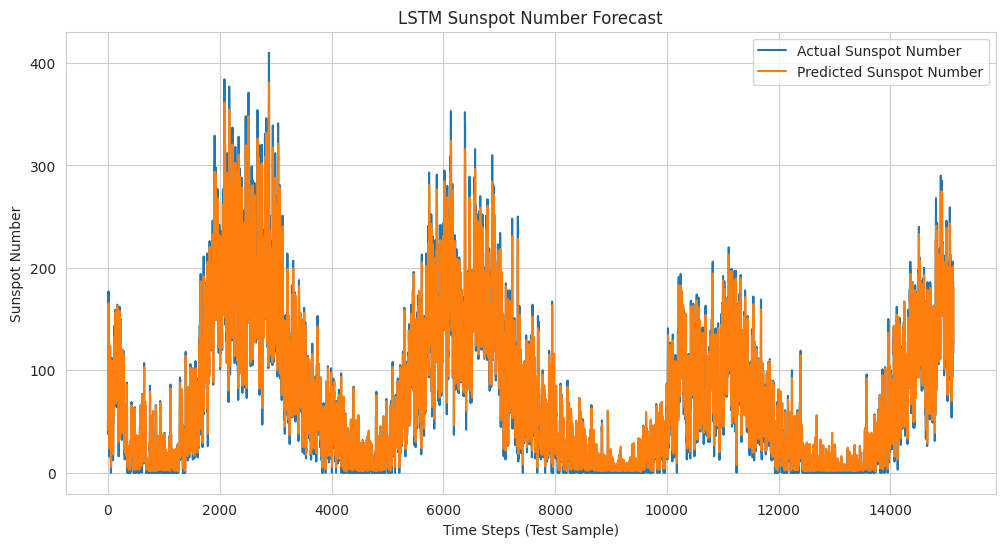

In [ ]:
# Plot results
plt.figure(figsize=(12,6))
plt.plot(actual, label='Actual Sunspot Number')
plt.plot(predictions, label='Predicted Sunspot Number')
plt.title('LSTM Sunspot Number Forecast')
plt.xlabel('Time Steps (Test Sample)')
plt.ylabel('Sunspot Number')
plt.legend()
plt.show()

In [ ]:
from sklearn.metrics import mean_squared_error

# Calculate Mean Squared Error
mse = mean_squared_error(actual, predictions)

# Calculate Root Mean Squared Error
rmse = np.sqrt(mse)

print(f'Mean Squared Error (MSE): {mse}')
print(f'Root Mean Squared Error (RMSE): {rmse}')

Mean Squared Error (MSE): 208.68826686099717
Root Mean Squared Error (RMSE): 14.446046755462104


In [ ]:
from tensorflow.keras.preprocessing.sequence import TimeseriesGenerator # type: ignore

# Define the time series generator
look_back = 30
batch_size = 32

train_generator = TimeseriesGenerator(data_scaled, data_scaled, length=look_back, batch_size=batch_size)
test_generator = TimeseriesGenerator(data_scaled, data_scaled, length=look_back, batch_size=batch_size, start_index=train_size)

# Build the LSTM model
model = Sequential()
model.add(tf.keras.layers.Input(shape=(look_back, 1)))
model.add(LSTM(50, activation='relu'))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mse')

# Train the model
history = model.fit(train_generator, epochs=10, validation_data=test_generator, verbose=1)

# Make predictions
predictions = model.predict(test_generator)
predictions = scaler.inverse_transform(predictions)

# Inverse-transform actual values for comparison
actual = scaler.inverse_transform(data_scaled[train_size + look_back:])

Epoch 1/10


/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


2364/2364 ━━━━━━━━━━━━━━━━━━━━ 42s 17ms/step - loss: 0.0058 - val_loss: 9.4990e-04
Epoch 2/10
2364/2364 ━━━━━━━━━━━━━━━━━━━━ 40s 17ms/step - loss: 0.0036 - val_loss: 9.2628e-04
Epoch 3/10
2364/2364 ━━━━━━━━━━━━━━━━━━━━ 37s 16ms/step - loss: 0.0034 - val_loss: 8.3863e-04
Epoch 4/10
2364/2364 ━━━━━━━━━━━━━━━━━━━━ 41s 16ms/step - loss: 0.0031 - val_loss: 7.3765e-04
Epoch 5/10
2364/2364 ━━━━━━━━━━━━━━━━━━━━ 39s 17ms/step - loss: 0.0029 - val_loss: 7.7684e-04
Epoch 6/10
2364/2364 ━━━━━━━━━━━━━━━━━━━━ 39s 16ms/step - loss: 0.0028 - val_loss: 7.2705e-04
Epoch 7/10
2364/2364 ━━━━━━━━━━━━━━━━━━━━ 40s 17ms/step - loss: 0.0030 - val_loss: 7.1738e-04
Epoch 8/10
2364/2364 ━━━━━━━━━━━━━━━━━━━━ 38s 16ms/step - loss: 0.0029 - val_loss: 7.4577e-04
Epoch 9/10
2364/2364 ━━━━━━━━━━━━━━━━━━━━ 44s 17ms/step - loss: 0.0030 - val_loss: 7.1520e-04
Epoch 10/10
2364/2364 ━━━━━━━━━━━━━━━━━━━━ 41s 17ms/step - loss: 0.0028 - val_loss: 7.2435e-04
473/473 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step


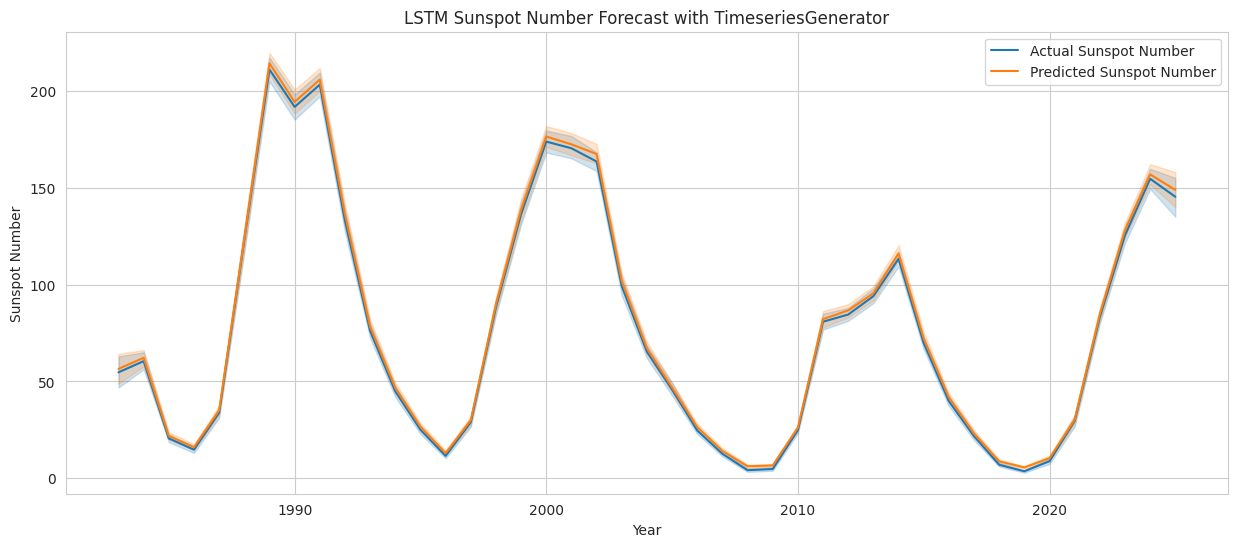

In [ ]:
# Plot results using seaborn
plt.figure(figsize=(15, 6))
sns.lineplot(x=df['Year'][-len(actual):], y=actual.flatten(), label='Actual Sunspot Number')
sns.lineplot(x=df['Year'][-len(predictions):], y=predictions.flatten(), label='Predicted Sunspot Number')
plt.title('LSTM Sunspot Number Forecast with TimeseriesGenerator')
plt.xlabel('Year')
plt.ylabel('Sunspot Number')
plt.legend()
plt.show()

In [ ]:
# Define the time_step (look-back period), e.g., 30 days
time_step = 30

# Predict the next 2 years (assuming daily data, 2 years = 730 days)
future_steps = 730

# Get the last time_step data points from the scaled data
last_data = data_scaled[-time_step:]

# Initialize the list to store future predictions
future_predictions = []

# Predict future values
for _ in range(future_steps):
    # Reshape the last_data to match the input shape of the model
    last_data_reshaped = last_data.reshape((1, time_step, 1))

    # Predict the next value
    next_value = model.predict(last_data_reshaped)

    # Append the predicted value to the future_predictions list
    future_predictions.append(next_value[0, 0])

    # Update the last_data by appending the predicted value and removing the first value
    last_data = np.append(last_data[1:], next_value, axis=0)

# Inverse transform the future predictions to the original scale
future_predictions = scaler.inverse_transform(np.array(future_predictions).reshape(-1, 1))

# Create a date range for the future predictions starting one day after the last date
last_date = df['Date'].iloc[-1]
future_dates = pd.date_range(start=last_date + pd.Timedelta(days=1), periods=future_steps)

# Create a DataFrame for the future predictions
future_df = pd.DataFrame(future_predictions, index=future_dates, columns=['Predicted Sunspot Number'])

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 202ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step
1/1 ━━━━━━━

ValueError: Input contains infinity or a value too large for dtype('float32').

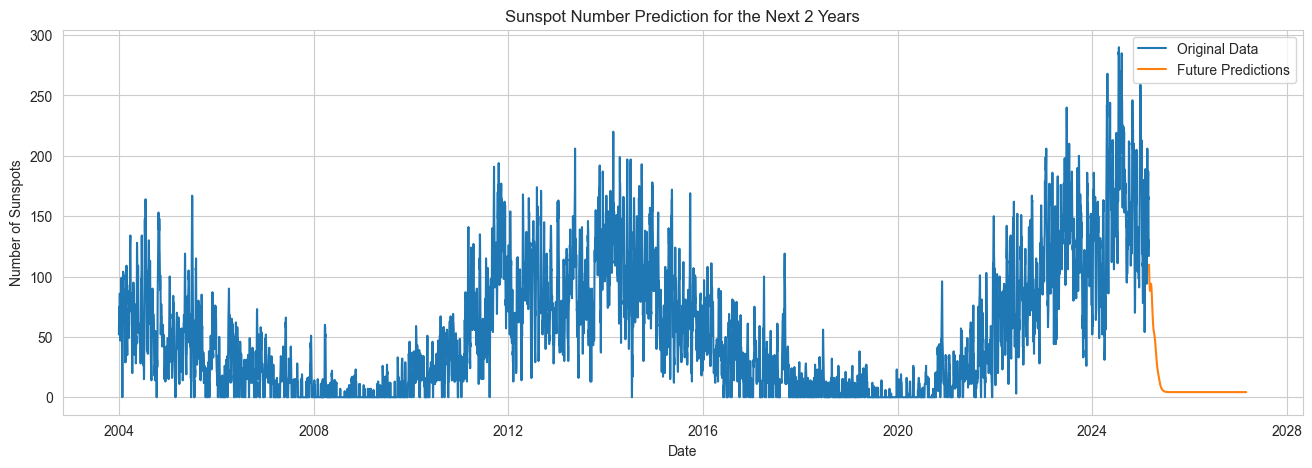

In [ ]:
# Plot the future predictions using seaborn
# Filter the original data to include only dates from 1920 onwards
filtered_df = df[df['Date'] >= '2004-01-01']

# Plot the future predictions using seaborn
plt.figure(figsize=(16, 5))
sns.lineplot(x=filtered_df['Date'], y=filtered_df['Number of Sunspots'], label='Original Data')
sns.lineplot(x=future_df.index, y=future_df['Predicted Sunspot Number'], label='Future Predictions')
plt.title('Sunspot Number Prediction for the Next 2 Years')
plt.xlabel('Date')
plt.ylabel('Number of Sunspots')
plt.legend()
plt.show()